In [1]:
import pandas as pd 
import ast
import networkx as nx
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from celluloid import Camera
from itertools import count

In [3]:
#read file with network
G = nx.read_graphml('/mynetwork.graphml')


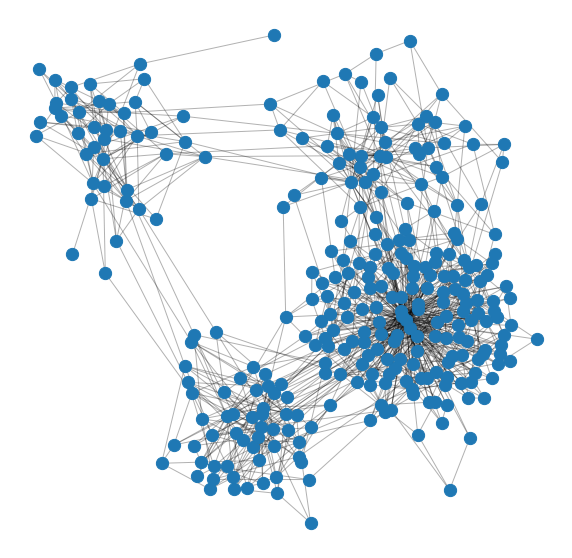

In [4]:
#draw graph and set layout
pos = nx.spring_layout(G, k=0.2)
plt.figure(figsize=(10, 10))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos=pos, node_size=150)
nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

In [5]:
#read csv with  results of model execution
data = pd.read_csv("path_of_file.csv", sep='\t')

#read column 'status' in csv with node status
status = data['status']

In [6]:
change_status = dict()

i = 0
for s in status:
    if s not in change_status:
        change_status[i] = ast.literal_eval(s)
    i += 1

In [7]:
#set initial status for node in network G
for n in G.nodes():
    for c in change_status[0]:
        if n == c:
            G.nodes[n]['status'] = change_status[0][c]

In [9]:
cdict = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

blue_red1 = LinearSegmentedColormap('BlueRed1', cdict)
plt.register_cmap(cmap=blue_red1)


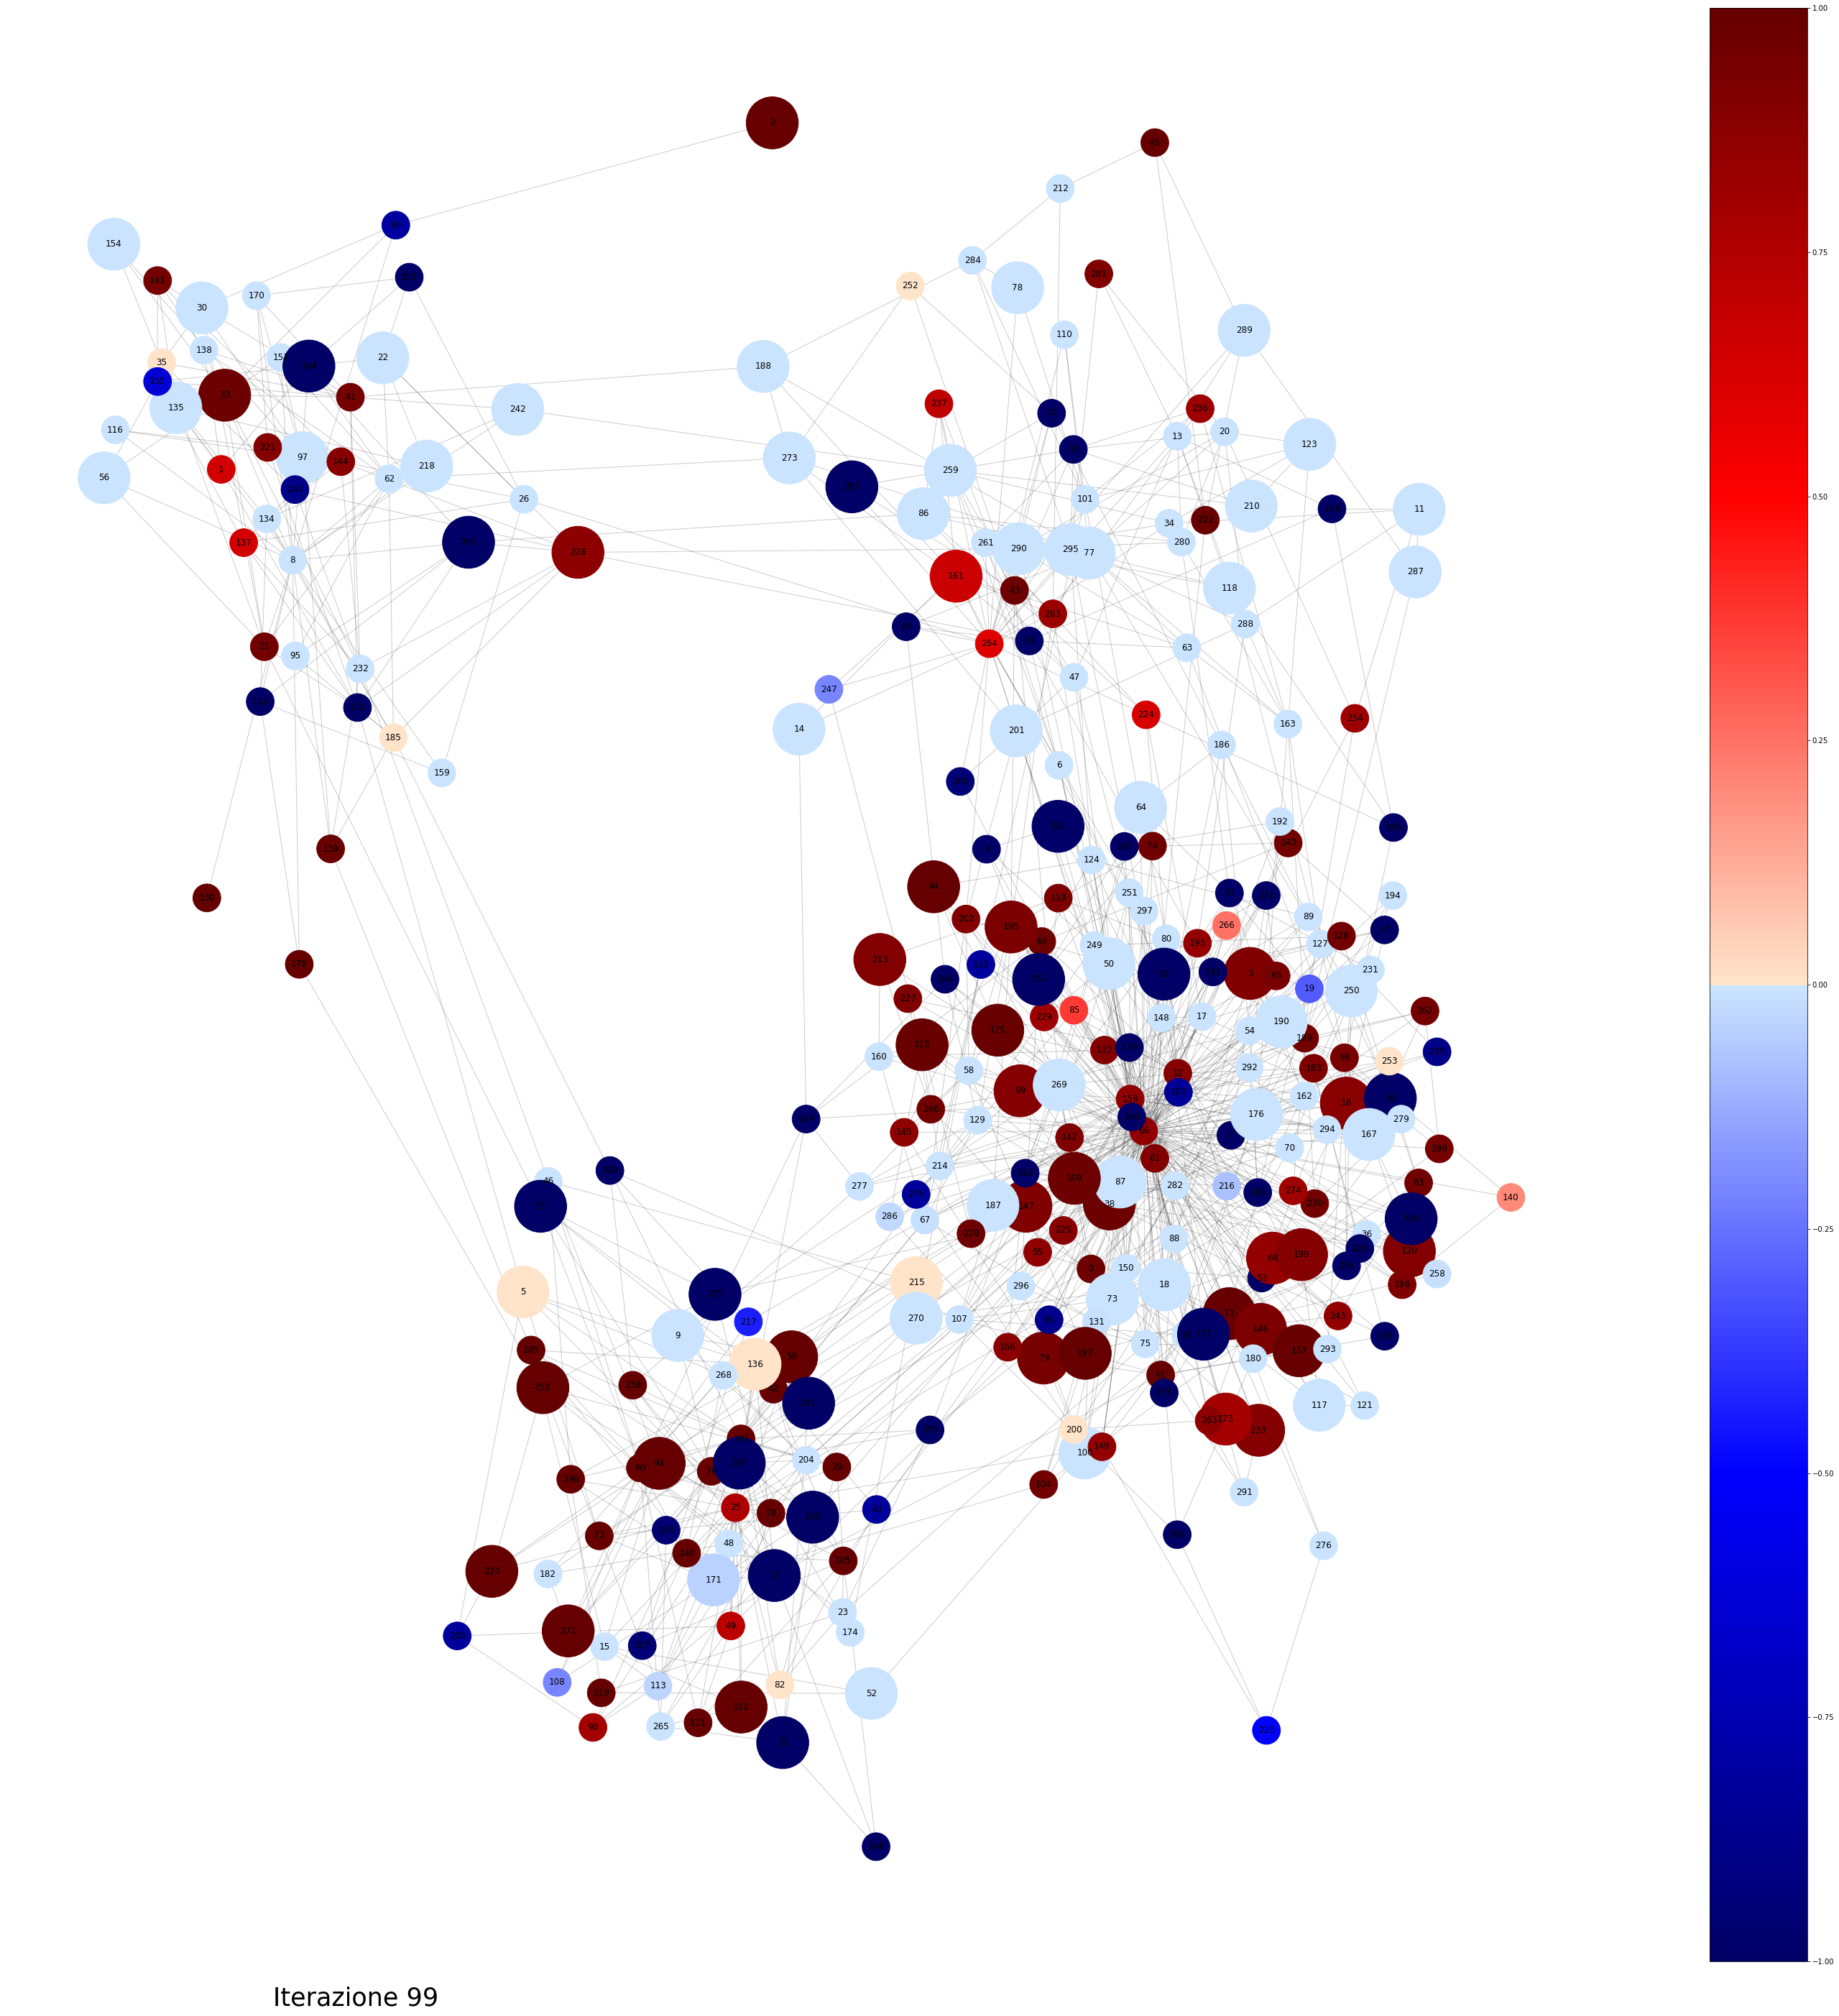

In [10]:

plt.rcParams['animation.ffmpeg_path'] = '/usr/local/Cellar/ffmpeg/4.2.2_1/bin/ffmpeg' 

fig = plt.figure(figsize=(50, 50))
camera = Camera(fig)
cmap = plt.get_cmap('BlueRed1')
nd = [] 
for n in G.nodes():
    nd.append(G.nodes[n]['status'])
    
nodex = nx.draw_networkx_nodes(G, pos, node_color = nd, vmin=-1, vmax=1, node_size=1700, cmap=cmap)

cb = plt.colorbar(nodex)
txt = plt.text(-0.8, -1,'Iteration 0', fontsize=35)
txt.set_visible(False)

for k in change_status.keys():
    changing_nodes = {}
    changing_nodes = change_status[k].keys()
    static_nodes = []
    size = {}
    labels = {}
    cb.remove()
    
    txt.set_visible(False)
    
    txt = plt.text(-0.8, -1,'Iteration '+str(k), fontsize=35)
    
    status_list = []
    for n in G.nodes():
        if n not in changing_nodes:
            static_nodes.append(n)

    for n in G.nodes():
        labels[n] = n
        if n in changing_nodes:
            
            G.nodes[n]['status'] = change_status[k].get(n)
            size[n] = 350
        else:
            size[n] = 100
        
        status_list.append(G.nodes[n]['status'])
    size_values = [v for v in size.values()]
    nodes = nx.draw_networkx_nodes(G, pos, node_color = status_list, vmin=-1, vmax=1, node_size=[v * 15 for v in size_values], cmap=cmap)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    label = nx.draw_networkx_labels(G, pos, labels)
    
    plt.axis('off')
    cb = plt.colorbar(nodes)
    
    plt.draw()
    camera.snap()
    
anim = camera.animate(blit=True)

anim.save('path_for_animation.mp4', writer='ffmpeg')
